# Labeling Lexicon

In [1]:
import pandas as pd

# Load positive and negative lexicons from files
positive_lexicon = pd.read_csv('positive.tsv', sep='\t', header=None)[0].tolist()
negative_lexicon = pd.read_csv('negative.tsv', sep='\t', header=None)[0].tolist()

lexicon = {
    'positive': positive_lexicon,
    'negative': negative_lexicon
}


In [2]:
# Assuming your dataset is in a CSV file
dataset = pd.read_excel('data.xlsx')
dataset.head()

,Data
0,Piala Dunia U20 di Indonesia Batal Messi ga ik...
1,Walaupun negaranya kalah di pe andingan Final ...
2,Rentetan cerita pilu Italy di Level Timnas Clu...
3,Uruguay menjuarai Piala Dunia U20 2023 Celeste...
4,Italia kalah dari Uruguay di final Piala Dunia...


In [3]:
dataset.count()

Data    1107
dtype: int64

In [4]:
def label_text(text):
    for label, keywords in lexicon.items():
        if any(keyword in text for keyword in keywords):
            return label
    return 'neutral'  # or any default label

dataset['label'] = dataset['Data'].apply(label_text)

# Remove rows with 'neutral' label
dataset = dataset[dataset['label'] != 'neutral']

dataset

,Data,label
0,Piala Dunia U20 di Indonesia Batal Messi ga ik...,negative
1,Walaupun negaranya kalah di pe andingan Final ...,positive
2,Rentetan cerita pilu Italy di Level Timnas Clu...,positive
3,Uruguay menjuarai Piala Dunia U20 2023 Celeste...,positive
4,Italia kalah dari Uruguay di final Piala Dunia...,positive
...,...,...
1102,Jgn sampai terulang sepe i kejuruhhan,positive
1103,FIFA mencabut P dunia u 20 karena sejarah keam...,positive
1104,Politik jangan dcampur sepakbola,positive
1105,Piala dunia U 20 yang mau jadi panggung Erik b...,positive


In [5]:
# Count the number of positive and negative labels
positive_count = (dataset['label'] == 'positive').sum()
negative_count = (dataset['label'] == 'negative').sum()

print(f'Number of positive labels: {positive_count}')
print(f'Number of negative labels: {negative_count}')

Number of positive labels: 1008
Number of negative labels: 59


In [6]:
dataset.to_csv('labeled_dataset.csv', index=False)

# Split Data Latih Data Uji

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your labeled dataset
df = pd.read_csv('labeled_dataset.csv')  # Replace with your actual file path

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Pembobotan

In [8]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(train_data['Data'])
X_test_tfidf = vectorizer.transform(test_data['Data'])

# Print the TF-IDF representation for the first document in the training set
first_document_tfidf = X_train_tfidf[0].toarray()
feature_names = vectorizer.get_feature_names_out()
print("TF-IDF Representation for the First Document:")
print(pd.DataFrame(first_document_tfidf, columns=feature_names))

TF-IDF Representation for the First Document:
    00  100   12   15   16   20  2023  2024   24  ada  ...  world  woy   ya  \
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  ...    0.0  0.0  0.0   

   yah  yakin  yang  yankees   yg  zlatan  zona  
0  0.0    0.0   0.0      0.0  0.0     0.0   0.0  

[1 rows x 1000 columns]


# Classification SVM

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train SVM on the TF-IDF representation
clf = SVC()
clf.fit(X_train_tfidf, train_data['label'])

# Predict on the test set
predictions = clf.predict(X_test_tfidf)

# Evaluate the performance
accuracy = accuracy_score(test_data['label'], predictions)
report = classification_report(test_data['label'], predictions)

print(f'Accuracy on the test set: {accuracy:.2f}')
print('\nClassification Report:\n', report)

Accuracy on the test set: 0.96

Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.42      0.53        12
    positive       0.97      0.99      0.98       202

    accuracy                           0.96       214
   macro avg       0.84      0.70      0.75       214
weighted avg       0.95      0.96      0.95       214



Confusion Matrix:
[[  5   7]
 [  2 200]]


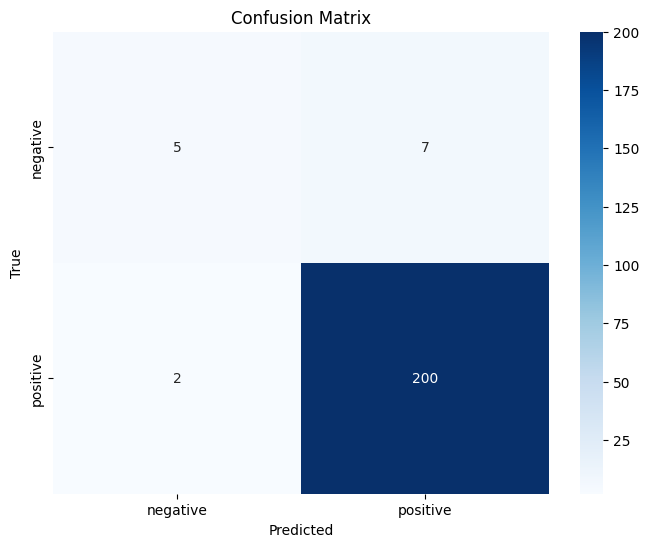

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_data['label'], predictions)

# Display the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


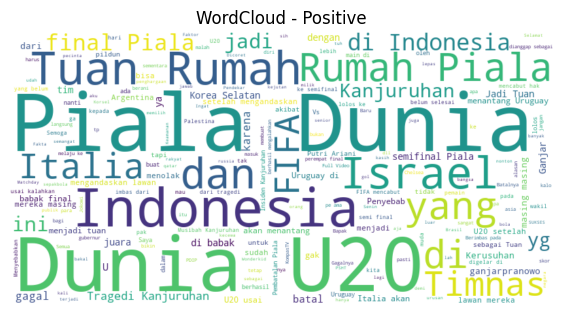

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate test data into positive, negative, and neutral
positive_text = ' '.join(test_data[test_data['label'] == 'positive']['Data'])
negative_text = ' '.join(test_data[test_data['label'] == 'negative']['Data'])
# neutral_text = ' '.join(test_data[test_data['label'] == 'neutral']['Data'])

# Create WordClouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
# wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Plot the WordClouds
plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('WordCloud - Positive')
plt.axis('off')

plt.show()


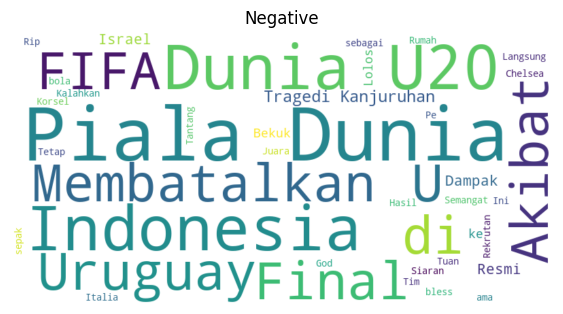

In [12]:
# Plot the WordClouds
plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative')
plt.axis('off')

plt.show()